**Chapter 4 – Training Models**

_This notebook contains all the sample code and solutions to the exercises in chapter 4._

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml3/blob/main/04_training_linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml3/blob/main/04_training_linear_models.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

# Setup

This project requires Python 3.7 or above:

In [2]:
from IPython.core.interactiveshell import InteractiveShell # make all output in ipython show, not just last line
InteractiveShell.ast_node_interactivity = "all"   # pretty print all cell's output and not just the last one
%matplotlib inline
import sklearn
sklearn.set_config(display="diagram")

In [3]:
import sys

assert sys.version_info >= (3, 7)

It also requires Scikit-Learn ≥ 1.0.1:

In [4]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

As we did in previous chapters, let's define the default font sizes to make the figures prettier:

In [5]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

And let's create the `images/training_linear_models` folder (if it doesn't already exist), and define the `save_fig()` function which is used through this notebook to save the figures in high-res for the book:

In [6]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Linear Regression

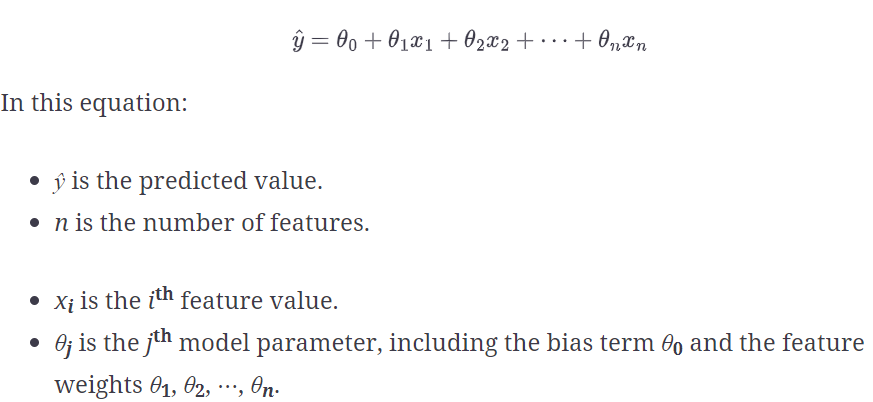

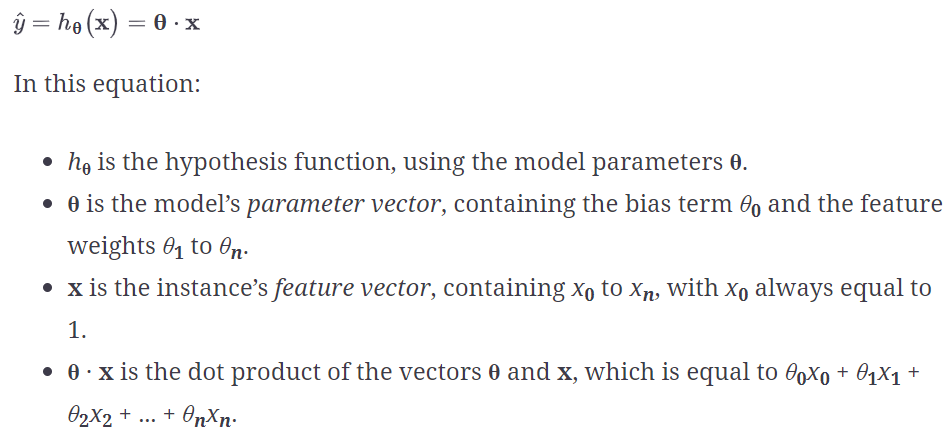

## The Normal Equation
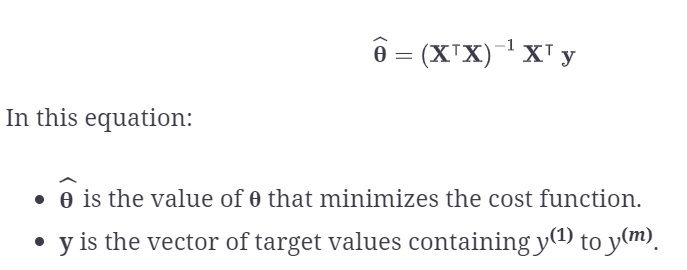

In [7]:
import numpy as np

np.random.seed(42)  # to make this code example reproducible
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

<Figure size 600x400 with 0 Axes>

Text(0.5, 0, '$x_1$')

Text(0, 0.5, '$y$')

(0.0, 2.0, 0.0, 15.0)

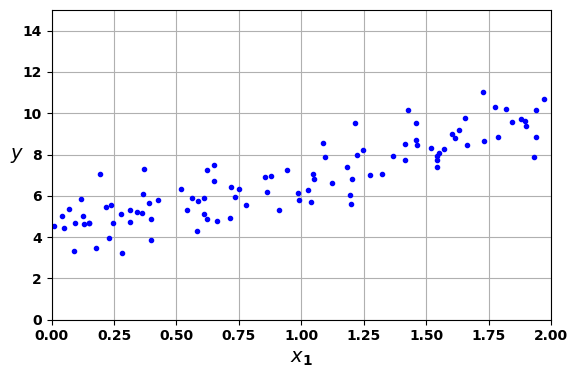

In [8]:
# extra code – generates and saves Figure 4–1

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
save_fig("generated_data_plot")
plt.show()

In [9]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [10]:
theta_best  # X = 2 * random normal (so range from zero to 2) and y = 4 + 3 * X + np.random.randn(m, 1) - slope 3, intecept 4

array([[4.21509616],
       [2.77011339]])

In [11]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

<Figure size 600x400 with 0 Axes>

Text(0.5, 0, '$x_1$')

Text(0, 0.5, '$y$')

(0.0, 2.0, 0.0, 15.0)

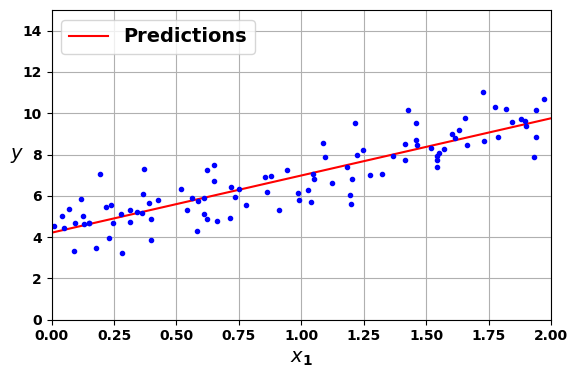

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
save_fig("linear_model_predictions_plot")

plt.show()

In [13]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_  # Notice that Scikit-Learn separates the bias term (intercept_) from the feature weights (coef_). 

LinearRegression()

(array([4.21509616]), array([[2.77011339]]))

In [14]:
lin_reg.predict(X_new)  # same values as linear algebra approach

array([[4.21509616],
       [9.75532293]])

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (the name stands for "least squares"), which you could call directly:

In [15]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the _pseudoinverse_ of $\mathbf{X}$ (specifically the Moore-Penrose inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse directly:

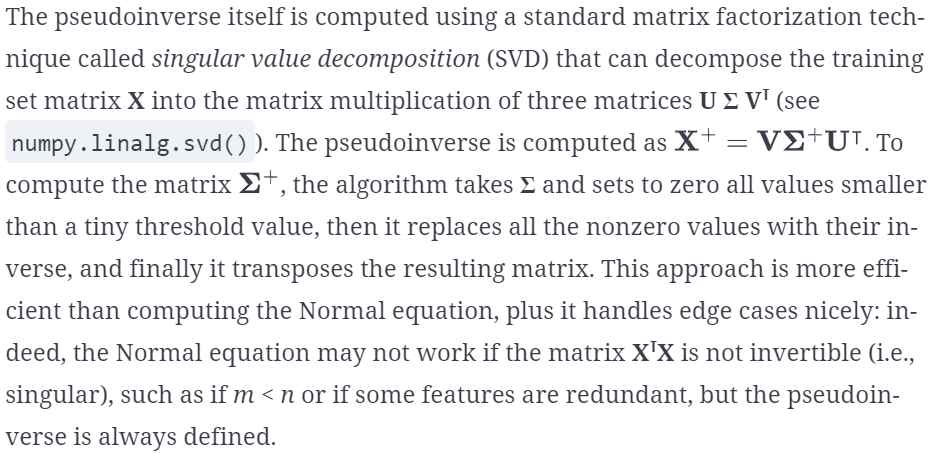

In [16]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

# Gradient Descent

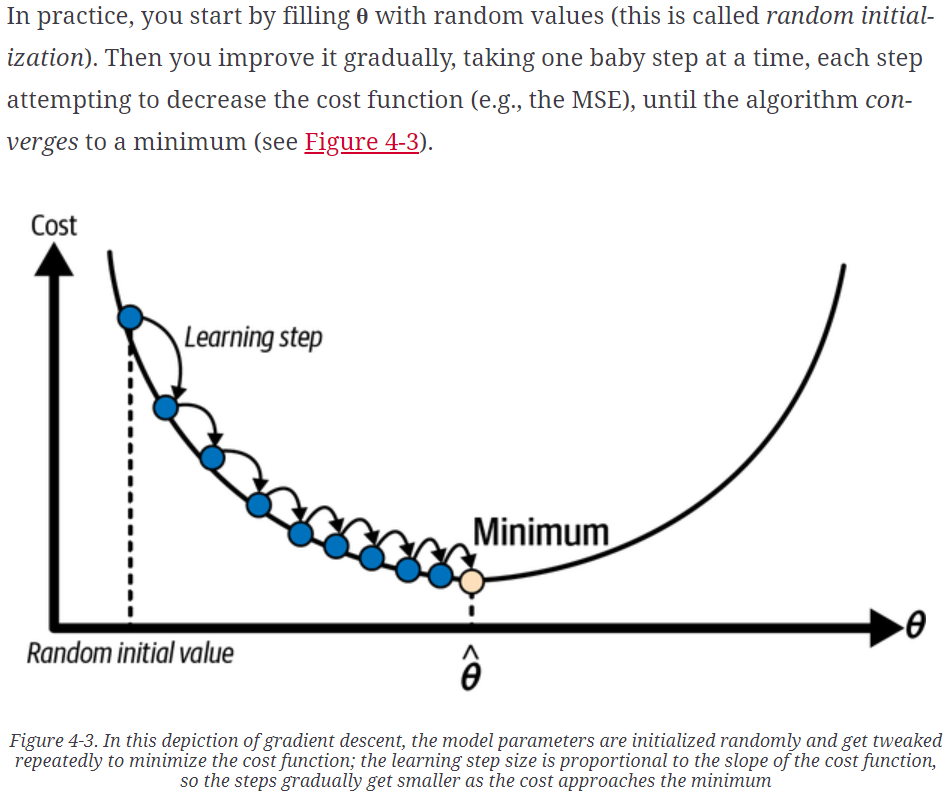

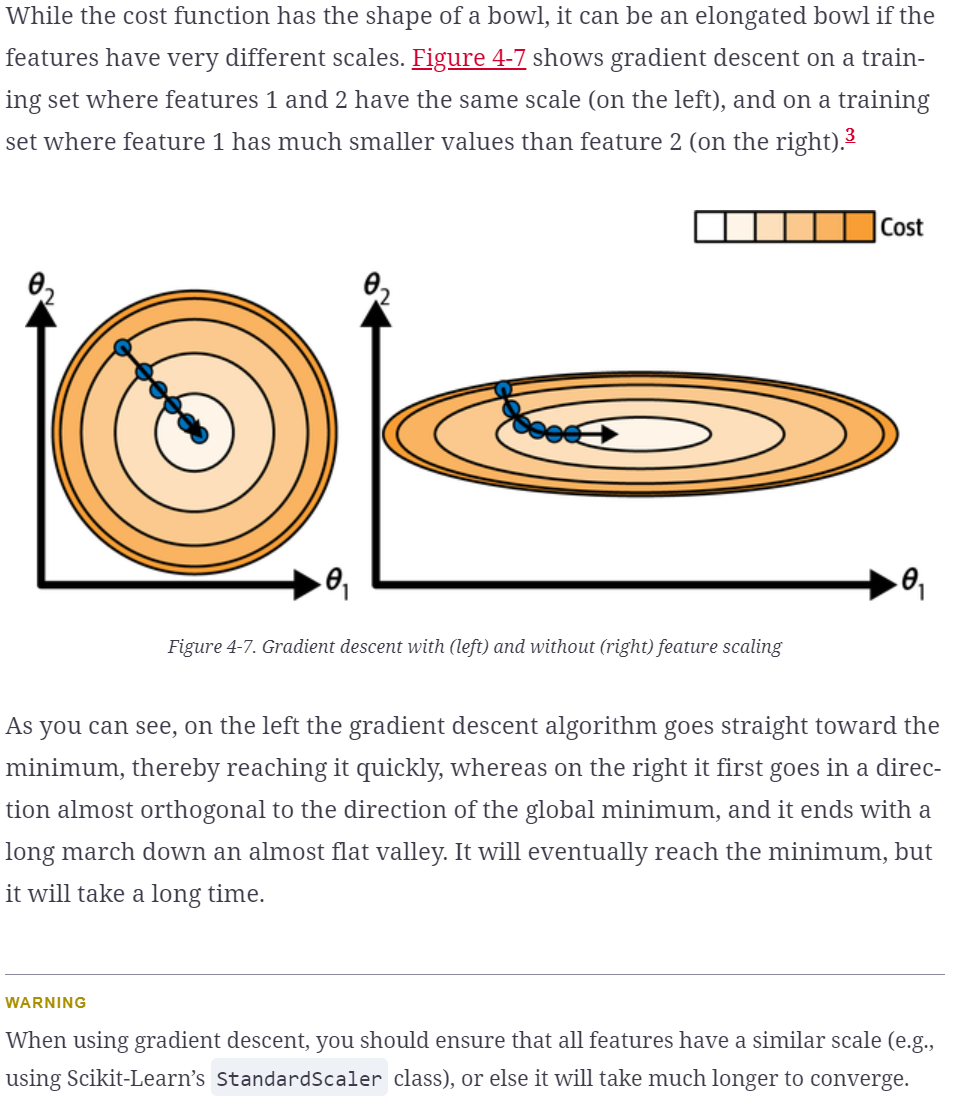

## Batch Gradient Descent

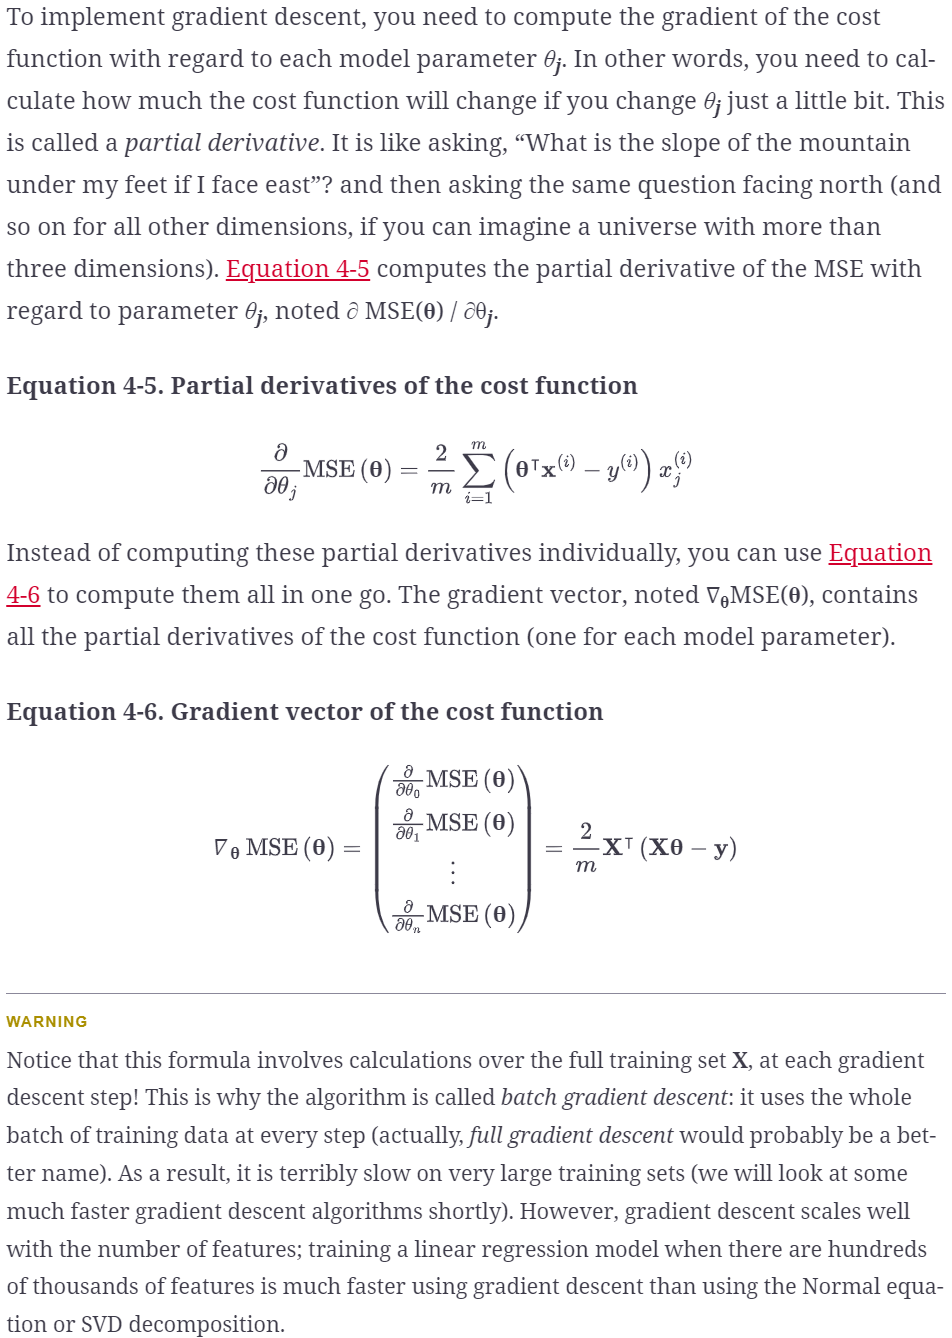

In [17]:
eta = 0.1  # learning rate
n_epochs = 1000
m = len(X_b)  # number of instances

np.random.seed(42)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

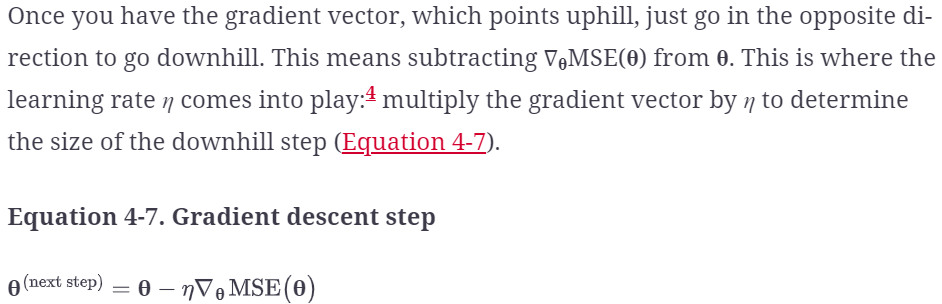
The trained model parameters:

In [18]:
theta

array([[4.21509616],
       [2.77011339]])

<Figure size 1000x400 with 0 Axes>

<Axes: >

[array([[0.75484649],
        [0.14524418]]),
 array([[0.99198951],
        [0.40504079]]),
 array([[1.2098747 ],
        [0.64308615]]),
 array([[1.41009054],
        [0.86117892]]),
 array([[1.5940943 ],
        [1.06096916]]),
 array([[1.76322291],
        [1.24397065]]),
 array([[1.91870288],
        [1.41157208]]),
 array([[2.06165941],
        [1.56504746]]),
 array([[2.19312478],
        [1.70556552]]),
 array([[2.31404603],
        [1.83419846]]),
 array([[2.42529197],
        [1.95192988]]),
 array([[2.52765967],
        [2.05966213]]),
 array([[2.62188036],
        [2.15822303]]),
 array([[2.70862492],
        [2.24837199]]),
 array([[2.78850879],
        [2.33080568]]),
 array([[2.86209661],
        [2.40616322]]),
 array([[2.92990638],
        [2.47503091]]),
 array([[2.99241334],
        [2.53794663]]),
 array([[3.05005348],
        [2.5954038 ]]),
 array([[3.10322679],
        [2.64785509]]),
 array([[3.15230025],
        [2.69571574]]),
 array([[3.19761051],
        [2.7

Text(0, 0.5, '$y$')

<Axes: >

[Text(0, 0.0, ''),
 Text(0, 2.0, ''),
 Text(0, 4.0, ''),
 Text(0, 6.0, ''),
 Text(0, 8.0, ''),
 Text(0, 10.0, ''),
 Text(0, 12.0, ''),
 Text(0, 14.0, ''),
 Text(0, 16.0, '')]

<Axes: >

[Text(0, 0.0, ''),
 Text(0, 0.2, ''),
 Text(0, 0.4, ''),
 Text(0, 0.6000000000000001, ''),
 Text(0, 0.8, ''),
 Text(0, 1.0, '')]

[array([[6.95002252],
        [6.94944782]]),
 array([[ 0.28501102],
        [-0.78276102]]),
 array([[7.55608242],
        [7.29981415]]),
 array([[-0.04445998],
        [-1.43492123]]),
 array([[8.16934876],
        [7.76272377]]),
 array([[-0.47976236],
        [-2.12027647]]),
 array([[8.81383043],
        [8.33294533]]),
 array([[-1.01597676],
        [-2.86017575]]),
 array([[9.50960322],
        [9.01086429]]),
 array([[-1.65346564],
        [-3.67358806]]),
 array([[10.27450483],
        [ 9.80127431]]),
 array([[-2.39673679],
        [-4.57841255]]),
 array([[11.12536693],
        [10.71261594]]),
 array([[-3.25372735],
        [-5.5924584 ]]),
 array([[12.0789366 ],
        [11.75653351]]),
 array([[-4.23538723],
        [-6.7342073 ]]),
 array([[13.15259329],
        [12.94766225]]),
 array([[-5.35547882],
        [-8.02343771]]),
 array([[14.36493591],
        [14.30358657]]),
 array([[-6.63053784],
        [-9.48176705]]),
 array([[15.73629266],
        [15.84493051]]),
 a

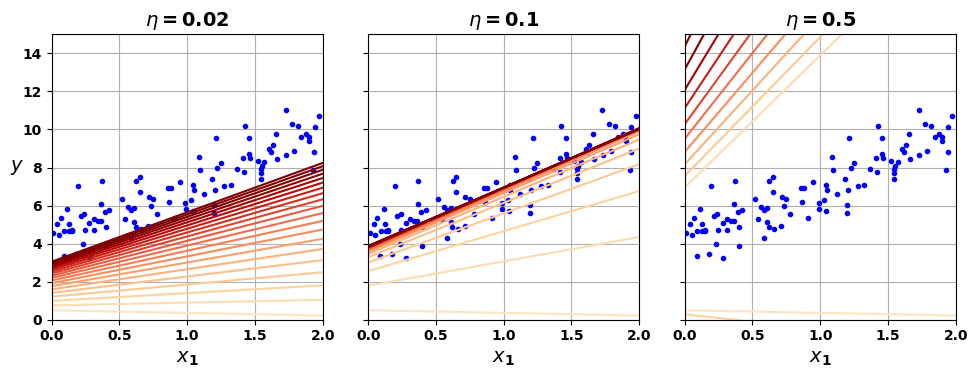

In [19]:
# extra code – generates and saves Figure 4–8

import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
save_fig("gradient_descent_plot")
plt.show()

## Stochastic Gradient Descent

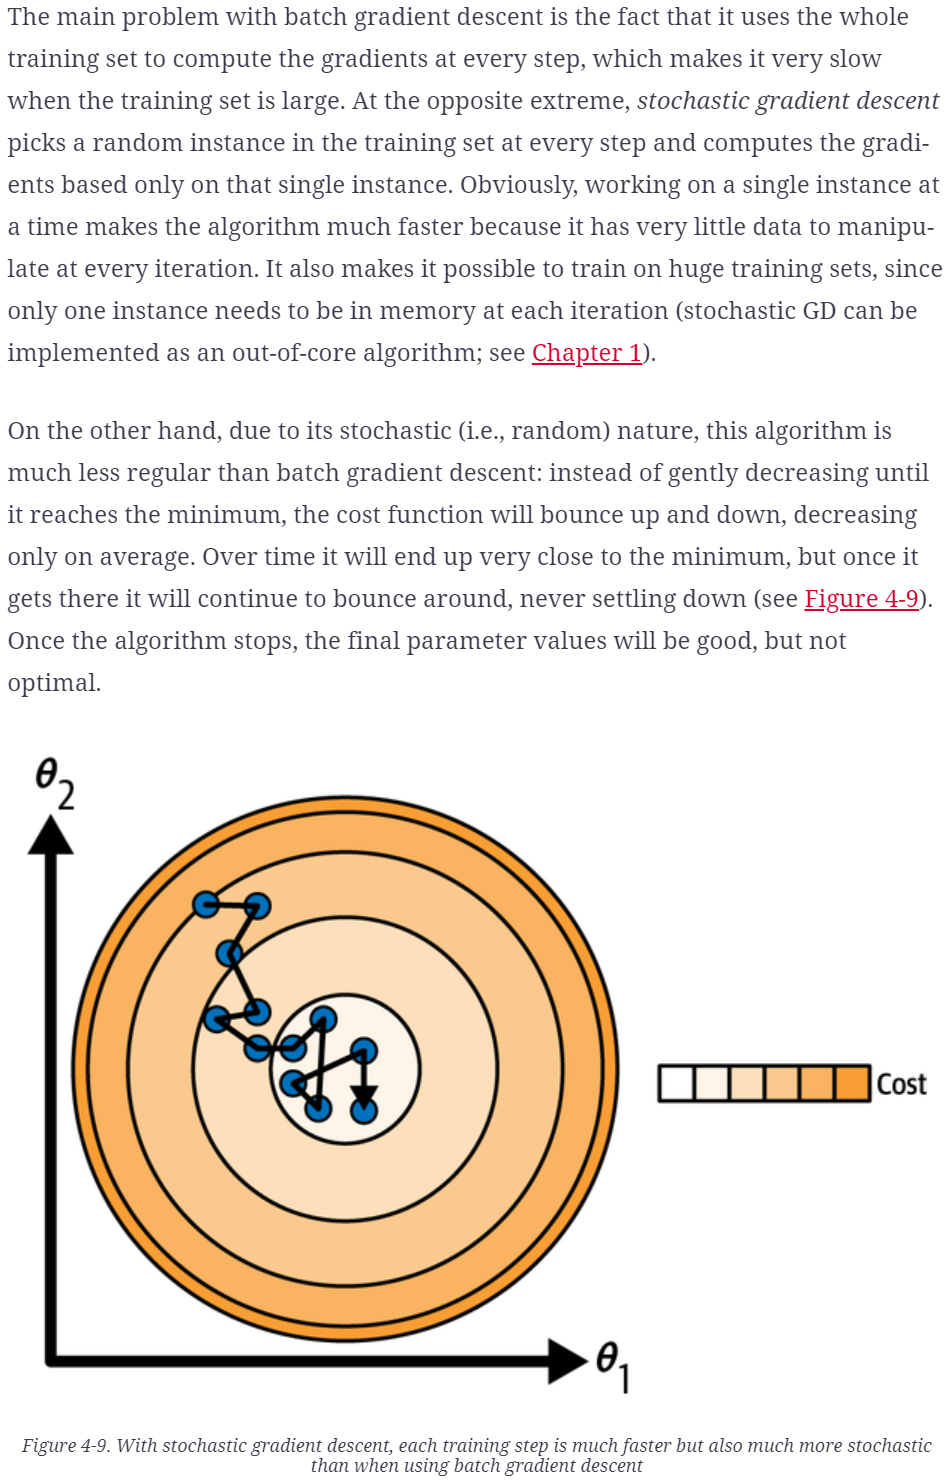

In [20]:
theta_path_sgd = []  # extra code – we need to store the path of theta in the
                     #              parameter space to plot the next figure

<Figure size 600x400 with 0 Axes>

Text(0.5, 0, '$x_1$')

Text(0, 0.5, '$y$')

(0.0, 2.0, 0.0, 15.0)

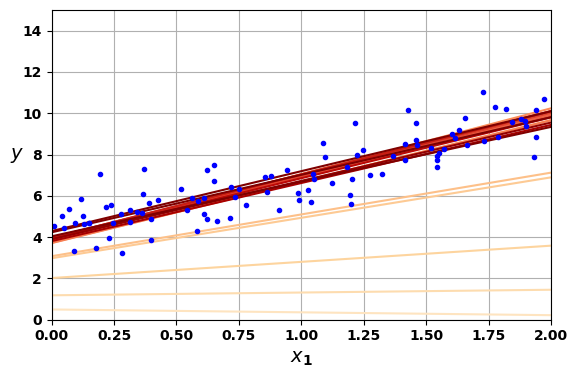

In [21]:
# This code implements stochastic gradient descent using a simple learning schedule:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

n_shown = 20  # extra code – just needed to generate the figure below
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting

for epoch in range(n_epochs):
    for iteration in range(m):  # m = len(X_b)

        # extra code – these 4 lines are used to generate the figure
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)

        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)  # extra code – to generate the figure

# extra code – this section beautifies and saves Figure 4–10
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
save_fig("sgd_plot")
plt.show()

In [22]:
theta

array([[4.21076011],
       [2.74856079]])

To perform linear regression using stochastic GD with Scikit-Learn, you can use the SGDRegressor class, which defaults to optimizing the MSE cost function. The following code runs for maximum 1,000 epochs (max_iter) or until the loss drops by less than 10–5 (tol) during 100 epochs (n_iter_no_change). It starts with a learning rate of 0.01 (eta0), using the default learning schedule (different from the one we used). Lastly, it does not use any regularization (penalty=None

In [23]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets


SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [24]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

## Mini-batch gradient descent

The last gradient descent algorithm we will look at is called mini-batch gradient descent. It is straightforward once you know batch and stochastic gradient descent: at each step, instead of computing the gradients based on the full training set (as in batch GD) or based on just one instance (as in stochastic GD), mini-batch GD computes the gradients on small random sets of instances called mini-batches. The main advantage of mini-batch GD over stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

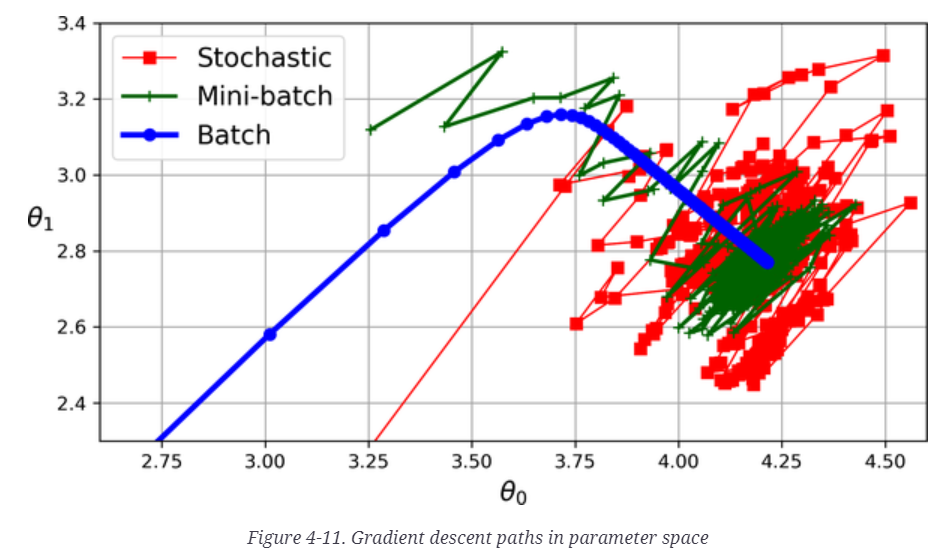

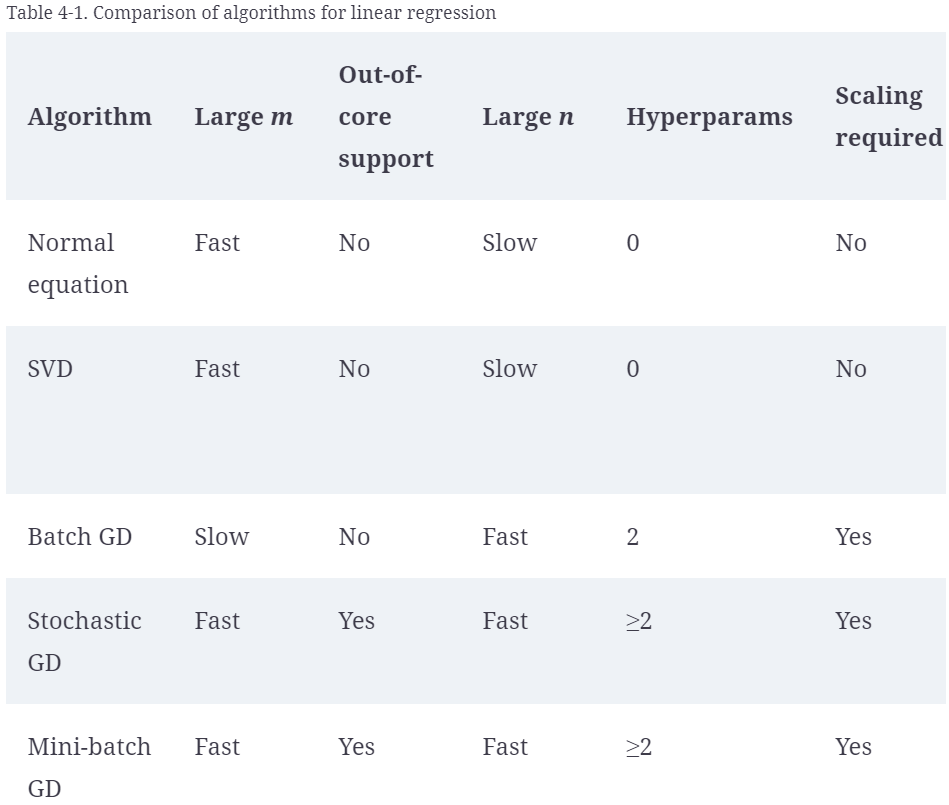

The code in this section is used to generate the next figure, it is not in the book.

<Figure size 700x400 with 0 Axes>

Text(0.5, 0, '$\\theta_0$')

Text(0, 0.5, '$\\theta_1$   ')

(2.6, 4.6, 2.3, 3.4)

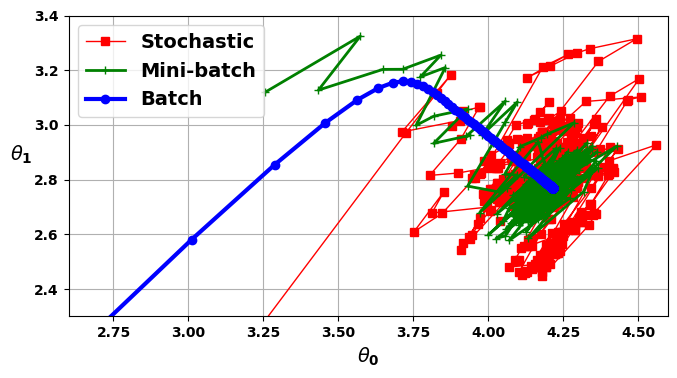

In [25]:
# extra code – this cell generates and saves Figure 4–11

from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

t0, t1 = 200, 1000  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta_path_mgd = []
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
         label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
plt.axis([2.6, 4.6, 2.3, 3.4])
plt.grid()
save_fig("gradient_descent_paths_plot")
plt.show()

# Polynomial Regression

In [26]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

<Figure size 600x400 with 0 Axes>

Text(0.5, 0, '$x_1$')

Text(0, 0.5, '$y$')

(-3.0, 3.0, 0.0, 10.0)

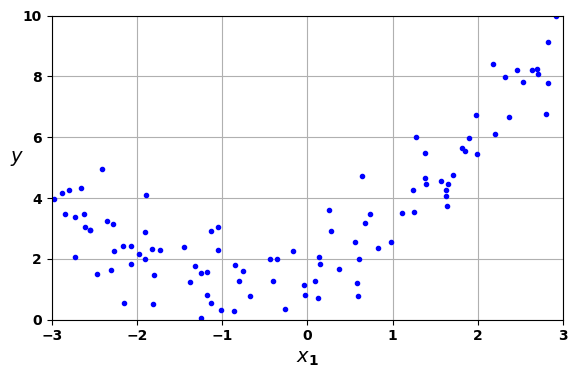

In [27]:
# extra code – this cell generates and saves Figure 4–12
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("quadratic_data_plot")
plt.show()

Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s PolynomialFeatures class to transform our training data, adding the square (second-degree polynomial) of each feature in the training set as a new feature (in this case there is just one feature):

In [28]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [29]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [30]:
lin_reg = LinearRegression()  # now fit linear regression to X with x and x**2 in the data
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_  # first coef is for x, the second is for x**2

LinearRegression()

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

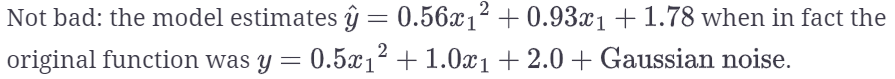

Note that you could do the same thing by just creating an x**2 column in the dataset.

<Figure size 600x400 with 0 Axes>

Text(0.5, 0, '$x_1$')

Text(0, 0.5, '$y$')

(-3.0, 3.0, 0.0, 10.0)

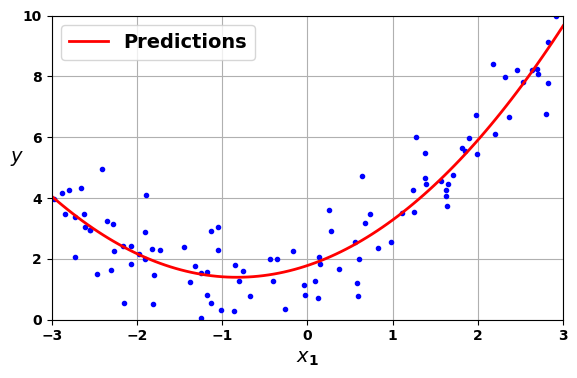

In [31]:
# extra code – this cell generates and saves Figure 4–13

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("quadratic_predictions_plot")
plt.show()

<Figure size 600x400 with 0 Axes>

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

Pipeline(steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=300, include_bias=False)),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

Text(0.5, 0, '$x_1$')

Text(0, 0.5, '$y$')

(-3.0, 3.0, 0.0, 10.0)

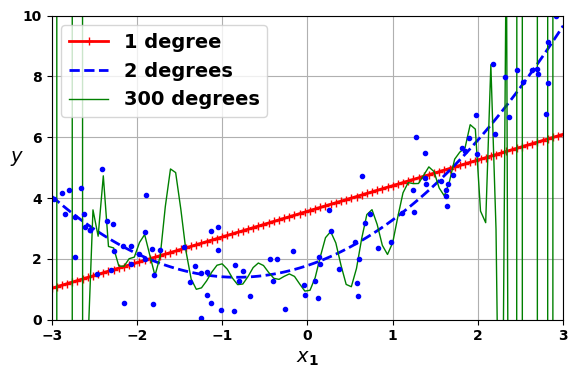

In [32]:
# extra code – this cell generates and saves Figure 4–14

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("high_degree_polynomials_plot")
plt.show()

# Learning Curves

If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting. If it performs poorly on both, then it is underfitting. This is one way to tell when a model is too simple or too complex.  Another way to tell is to look at the learning curves, which are plots of the model’s training error and validation error as a function of the training iteration: just evaluate the model at regular intervals during training on both the training set and the validation set, and plot the results. If the model cannot be trained incrementally (i.e., if it does not support partial_fit() or warm_start), then you must train it several times on gradually larger subsets of the training set.

Scikit-Learn has a useful learning_curve() function to help with this: it trains and evaluates the model using cross-validation. By default it retrains the model on growing subsets of the training set, but if the model supports incremental learning you can set exploit_incremental_learning=True when calling learning_curve() and it will train the model incrementally instead. The function returns the training set sizes at which it evaluated the model, and the training and validation scores it measured for each size and for each cross-validation fold. Let’s use this function to look at the learning curves of the plain linear regression model

<Figure size 600x400 with 0 Axes>

Text(0.5, 0, 'Training set size')

Text(0, 0.5, 'RMSE')

(0.0, 80.0, 0.0, 2.5)

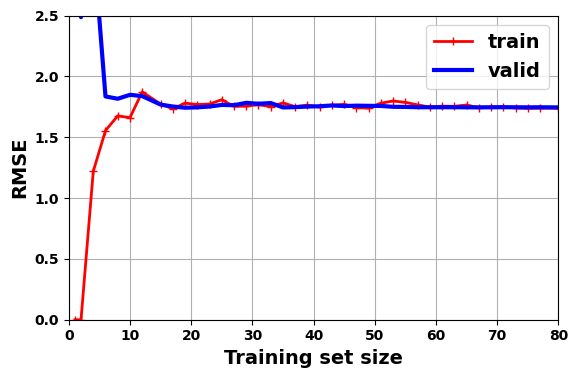

In [33]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

# extra code – beautifies and saves Figure 4–15
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])
save_fig("underfitting_learning_curves_plot")

plt.show()

This model is underfitting. To see why, first let’s look at the training error. When there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero. But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all. So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn’t make the average error much better or worse. Now let’s look at the validation error. When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite large. Then, as the model is shown more training examples, it learns, and thus the validation error slowly goes down. However, once again a straight line cannot do a good job of modeling the data, so the error ends up at a plateau, very close to the other curve.

In [34]:
# learning curves for 10th degree polynomial
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

<Figure size 600x400 with 0 Axes>

Text(0.5, 0, 'Training set size')

Text(0, 0.5, 'RMSE')

(0.0, 80.0, 0.0, 2.5)

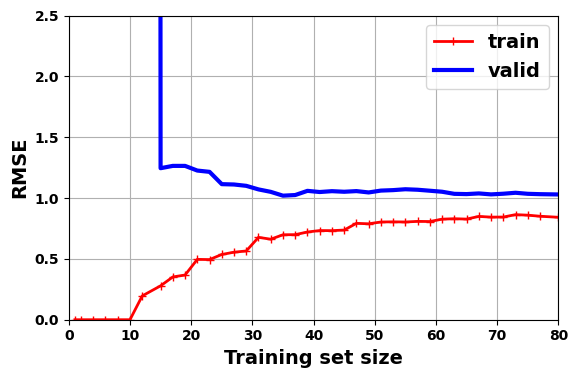

In [35]:
# extra code – generates and saves Figure 4–16

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
save_fig("learning_curves_plot")
plt.show()

These learning curves look a bit like the previous ones, but there are two very important differences:

The error on the training data is much lower than before.

There is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model. If you used a much larger training set, however, the two curves would continue to get closer.

# Regularized Linear Models

An important theoretical result of statistics and machine learning is the fact that a model’s generalization error can be expressed as the sum of three very different errors:

Bias
This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.⁠6

Variance
This part is due to the model’s excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance and thus overfit the training data.

Irreducible error
This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (e.g., fix the data sources, such as broken sensors, or detect and remove outliers).

Increasing a model’s complexity will typically increase its variance and reduce its bias. Conversely, reducing a model’s complexity increases its bias and reduces its variance. This is why it is called a trade-off.

## Ridge Regression

Note: you should scale teh data using a standard scaler since the parameters are sensitive to the scale of the data
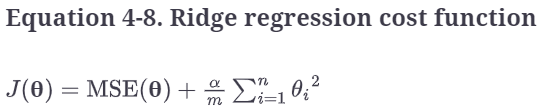

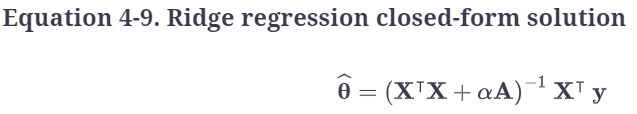

Let's generate a very small and noisy linear dataset:

In [36]:
# extra code – we've done this type of generation several times before
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

<Figure size 600x400 with 0 Axes>

Text(0.5, 0, '$x_1$')

Text(0, 0.5, '$y$  ')

(0.0, 3.0, 0.0, 3.5)

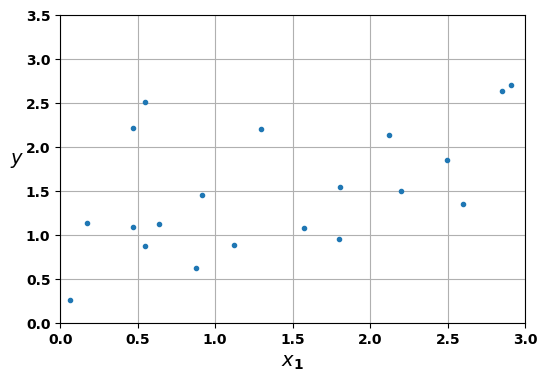

In [37]:
# extra code – a quick peek at the dataset we just generated
plt.figure(figsize=(6, 4))
plt.plot(X, y, ".")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

In [38]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")  # uses matrix factorization using Cholesky method
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

Ridge(alpha=0.1, solver='cholesky')

array([[1.55325833]])

<Figure size 900x350 with 0 Axes>

<Axes: >

Text(0, 0.5, '$y$  ')

<Axes: >

[Text(0, 0.0, ''),
 Text(0, 0.5, ''),
 Text(0, 1.0, ''),
 Text(0, 1.5, ''),
 Text(0, 2.0, ''),
 Text(0, 2.5, ''),
 Text(0, 3.0, ''),
 Text(0, 3.5, '')]

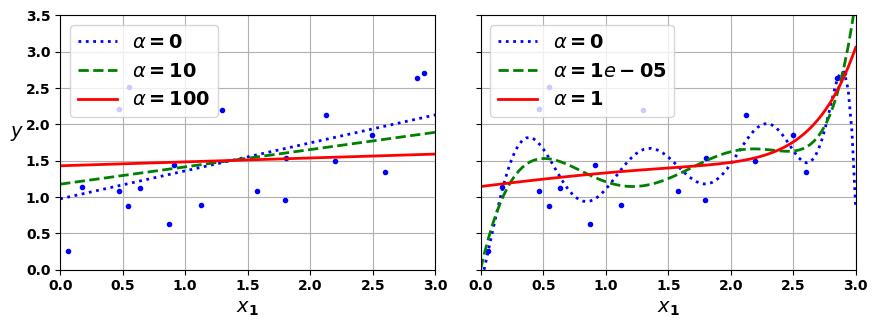

In [39]:
# extra code – this cell generates and saves Figure 4–17

def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, "b.", linewidth=3)
    for alpha, style in zip(alphas, ("b:", "g--", "r-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model)
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$")
    plt.axis([0, 3, 0, 3.5])
    plt.grid()

plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
save_fig("ridge_regression_plot")
plt.show()

In [40]:
# Ridge regression using stochastic gradient descent

sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42)  # penalty is l2 - Ridge, eta is learning rate
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets
sgd_reg.predict([[1.5]])

SGDRegressor(alpha=0.005, random_state=42, tol=None)

array([1.55302613])

In [41]:
# extra code – show that we get roughly the same solution as earlier when
#              we use Stochastic Average GD (solver="sag")
ridge_reg = Ridge(alpha=0.1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

Ridge(alpha=0.1, random_state=42, solver='sag')

array([[1.55326019]])

In [42]:
# extra code – shows the closed form solution of Ridge regression,
#              compare with the next Ridge model's learned parameters below
alpha = 0.1
A = np.array([[0., 0.], [0., 1.]])
X_b = np.c_[np.ones(m), X]
np.linalg.inv(X_b.T @ X_b + alpha * A) @ X_b.T @ y

array([[0.97898394],
       [0.3828496 ]])

In [43]:
ridge_reg.intercept_, ridge_reg.coef_  # extra code

(array([0.97896386]), array([[0.38286422]]))

The RidgeCV class also performs ridge regression, but it automatically tunes hyperparameters using cross-validation. It’s roughly equivalent to using GridSearchCV, but it’s optimized for ridge regression and runs much faster. Several other estimators (mostly linear) also have efficient CV variants, such as LassoCV and ElasticNetCV.

## Lasso Regression

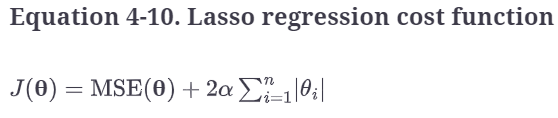

An important characteristic of lasso regression is that it tends to eliminate the weights of the least important features (i.e., set them to zero). For example, the dashed line in the righthand plot in Figure 4-18 (with α = 0.01) looks roughly cubic: all the weights for the high-degree polynomial features are equal to zero. In other words, lasso regression automatically performs feature selection and outputs a sparse model with few nonzero feature weights.

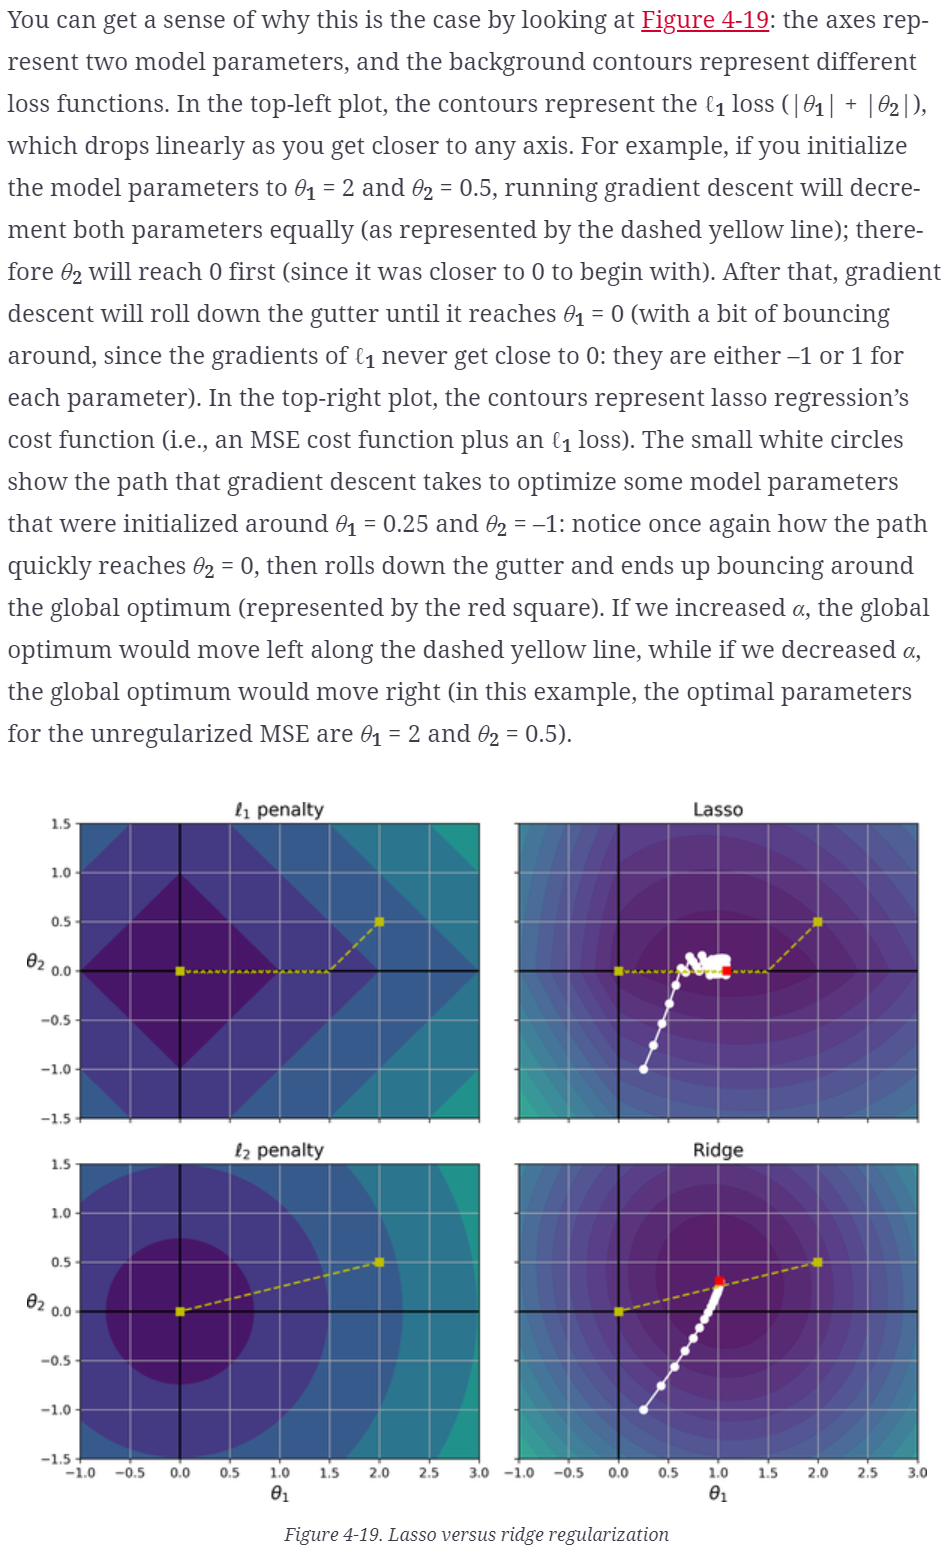
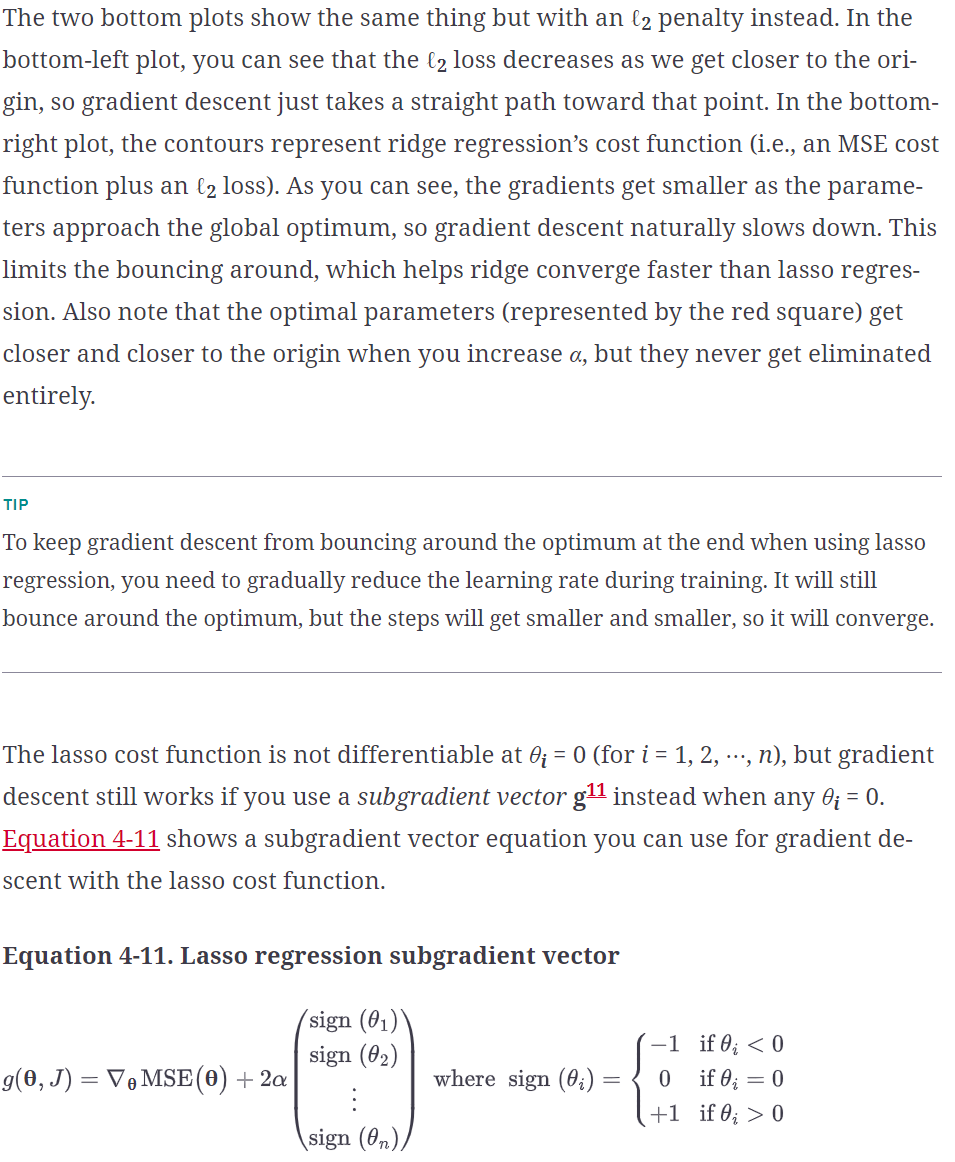

In [44]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

Lasso(alpha=0.1)

array([1.53788174])

<Figure size 900x350 with 0 Axes>

<Axes: >

Text(0, 0.5, '$y$  ')

<Axes: >

[Text(0, 0.0, ''),
 Text(0, 0.5, ''),
 Text(0, 1.0, ''),
 Text(0, 1.5, ''),
 Text(0, 2.0, ''),
 Text(0, 2.5, ''),
 Text(0, 3.0, ''),
 Text(0, 3.5, '')]

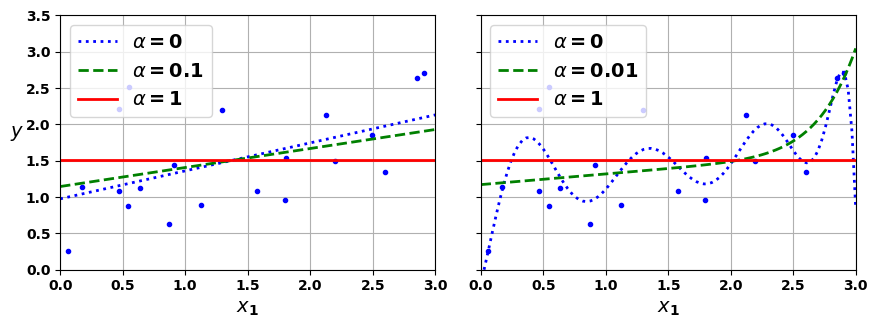

In [45]:
# extra code – this cell generates and saves Figure 4–18
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 1e-2, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
save_fig("lasso_regression_plot")
plt.show()

Text(0.5, 1.0, '$\\ell_1$ penalty')

(-1.0, 3.0, -1.5, 1.5)

Text(0, 0.5, '$\\theta_2$')

Text(0.5, 1.0, 'Lasso')

(-1.0, 3.0, -1.5, 1.5)

Text(0.5, 1.0, '$\\ell_2$ penalty')

(-1.0, 3.0, -1.5, 1.5)

Text(0.5, 0, '$\\theta_1$')

Text(0, 0.5, '$\\theta_2$')

Text(0.5, 1.0, 'Ridge')

(-1.0, 3.0, -1.5, 1.5)

Text(0.5, 0, '$\\theta_1$')

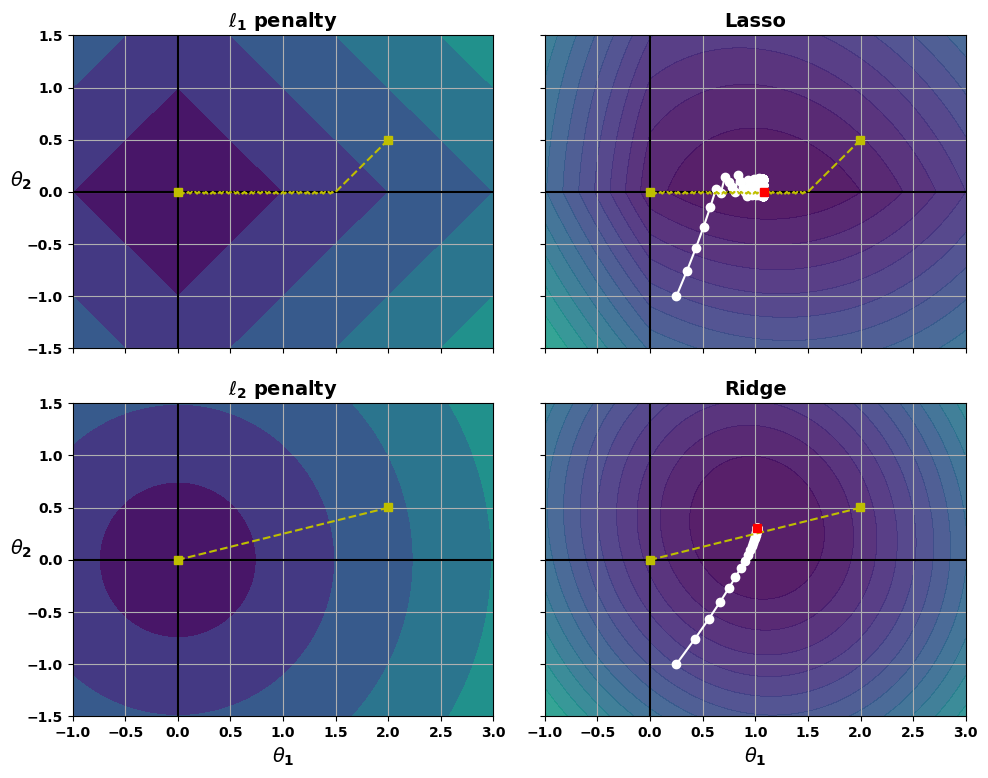

In [46]:
# extra code – this BIG cell generates and saves Figure 4–19

t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1 / len(Xr) * ((T @ Xr.T - yr.T) ** 2).sum(axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(J.argmin(), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

def bgd_path(theta, X, y, l1, l2, core=1, eta=0.05, n_iterations=200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = (core * 2 / len(X) * X.T @ (X @ theta - y)
                     + l1 * np.sign(theta) + l2 * theta)
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))

for i, N, l1, l2, title in ((0, N1, 2.0, 0, "Lasso"), (1, N2, 0, 2.0, "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2 ** 2

    tr_min_idx = np.unravel_index(JR.argmin(), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levels = np.exp(np.linspace(0, 1, 20)) - 1
    levelsJ = levels * (J.max() - J.min()) + J.min()
    levelsJR = levels * (JR.max() - JR.min()) + JR.min()
    levelsN = np.linspace(0, N.max(), 10)

    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(theta=np.array([[2.0], [0.5]]), X=Xr, y=yr,
                      l1=np.sign(l1) / 3, l2=np.sign(l2), core=0)
    ax = axes[i, 0]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, N / 2.0, levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(fr"$\ell_{i + 1}$ penalty")
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")
    ax.set_ylabel(r"$\theta_2$", rotation=0)

    ax = axes[i, 1]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")

save_fig("lasso_vs_ridge_plot")
plt.show()

## Elastic Net

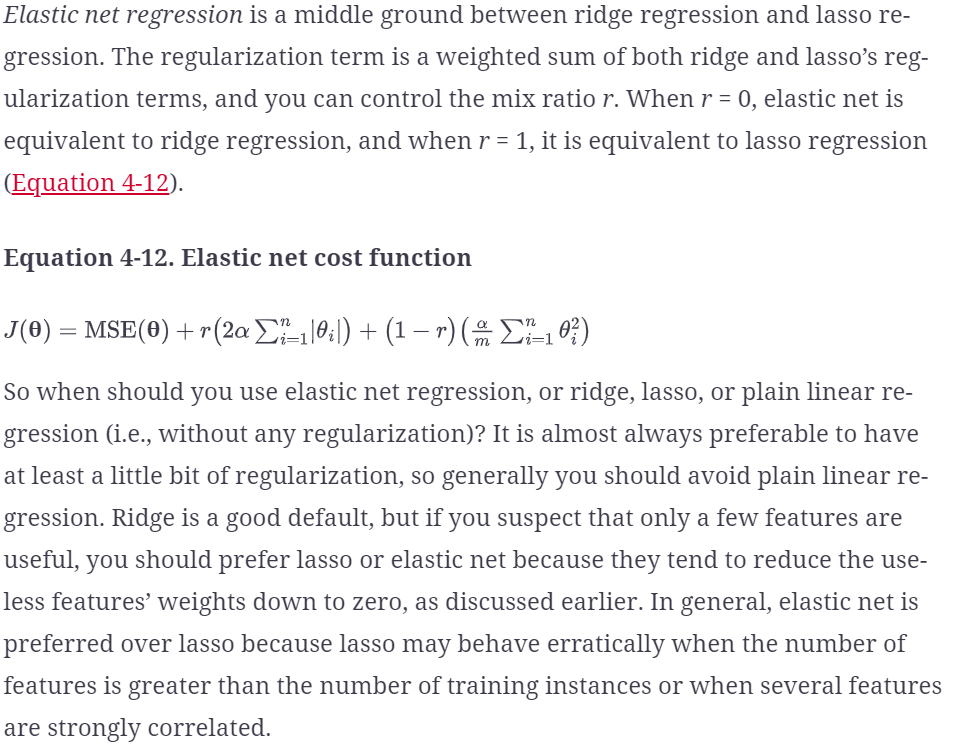

In [47]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

ElasticNet(alpha=0.1)

array([1.54333232])

## Early Stopping

A very different way to regularize iterative learning algorithms such as gradient descent is to stop training as soon as the validation error reaches a minimum. This is called early stopping. Figure 4-20 shows a complex model (in this case, a high-degree polynomial regression model) being trained with batch gradient descent on the quadratic dataset we used earlier. As the epochs go by, the algorithm learns, and its prediction error (RMSE) on the training set goes down, along with its prediction error on the validation set. After a while, though, the validation error stops decreasing and starts to go back up. This indicates that the model has started to overfit the training data. With early stopping you just stop training as soon as the validation error reaches the minimum.

With stochastic and mini-batch gradient descent, the curves are not so smooth, and it may be hard to know whether you have reached the minimum or not. One solution is to stop only after the validation error has been above the minimum for some time (when you are confident that the model will not do any better), then roll back the model parameters to the point where the validation error was at a minimum.

This code first adds the polynomial features and scales all the input features, both for the training set and for the validation set (the code assumes that you have split the original training set into a smaller training set and a validation set). Then it creates an SGDRegressor model with no regularization and a small learning rate. In the training loop, it calls partial_fit() instead of fit(), to perform incremental learning. At each epoch, it measures the RMSE on the validation set. If it is lower than the lowest RMSE seen so far, it saves a copy of the model in the best_model variable. This implementation does not actually stop training, but it lets you revert to the best model after training. Note that the model is copied using copy.deepcopy(), because it copies both the model’s hyperparameters and the learned parameters. In contrast, sklearn.base.clone() only copies the model’s hyperparameters.

Let's go back to the quadratic dataset we used earlier:

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

<Figure size 600x400 with 0 Axes>

Text(249, 1.9099344710854789, 'Best model')

Text(0.5, 0, 'Epoch')

Text(0, 0.5, 'RMSE')

(0.0, 500.0, 0.0, 3.5)

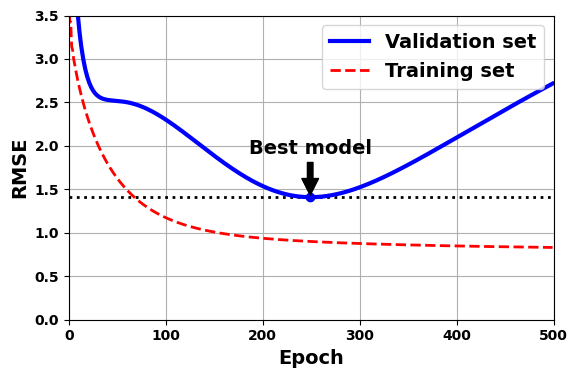

In [48]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# extra code – creates the same quadratic dataset as earlier and splits it
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

#scales the data first

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [], []  # extra code – it's for the figure below

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

    # extra code – we evaluate the train error and save it for the figure
    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = mean_squared_error(y_train, y_train_predict, squared=False)
    val_errors.append(val_error)
    train_errors.append(train_error)

# extra code – this section generates and saves Figure 4–20
best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6, 4))
plt.annotate('Best model',
             xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse + 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()
save_fig("early_stopping_plot")
plt.show()

# Logistic Regression

 Logistic regression (also called logit regression) is commonly used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?). If the estimated probability is greater than a given threshold (typically 50%), then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), and otherwise it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). This makes it a binary classifier.
 
 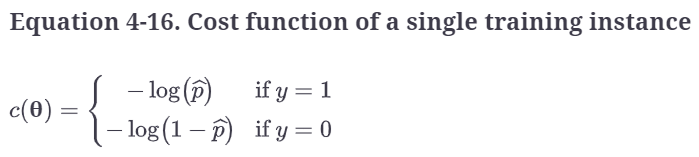
 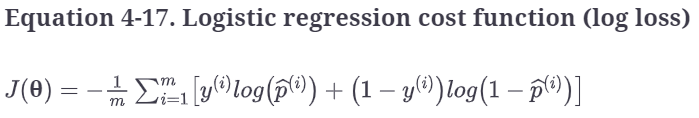
 
 The bad news is that there is no known closed-form equation to compute the value of θ that minimizes this cost function (there is no equivalent of the Normal equation). But the good news is that this cost function is convex, so gradient descent (or any other optimization algorithm) is guaranteed to find the global minimum (if the learning rate is not too large and you wait long enough). The partial derivatives of the cost function with regard to the jth model parameter θj are given by Equation 4-18.
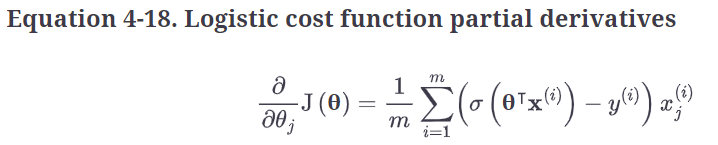

## Estimating Probabilities

<Figure size 800x300 with 0 Axes>

Text(0.5, 0, 't')

(-6.0, 6.0, -0.1, 1.1)

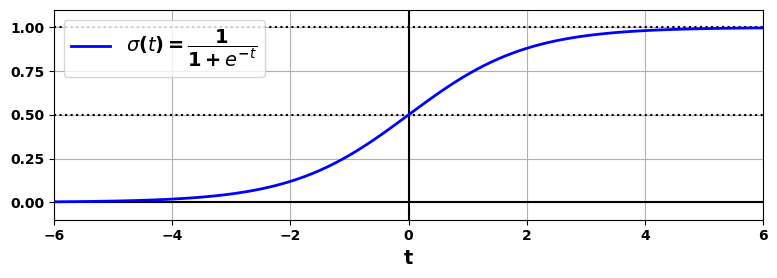

In [49]:
# extra code – generates and saves Figure 4–21

lim = 6
t = np.linspace(-lim, lim, 100)
sig = 1 / (1 + np.exp(-t))

plt.figure(figsize=(8, 3))
plt.plot([-lim, lim], [0, 0], "k-")
plt.plot([-lim, lim], [0.5, 0.5], "k:")
plt.plot([-lim, lim], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim, lim, -0.1, 1.1])
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])
plt.grid()
save_fig("logistic_function_plot")
plt.show()

## Decision Boundaries

In [50]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [51]:
print(iris.DESCR)  # extra code – it's a bit too long

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [52]:
iris.data.head(3)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2

In [53]:
iris.target.head(3)  # note that the instances are not shuffled

0    0
1    0
2    0
Name: target, dtype: int32

In [54]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

<Figure size 800x300 with 0 Axes>

Text(0.5, 0, 'Petal width (cm)')

Text(0, 0.5, 'Probability')

(0.0, 3.0, -0.02, 1.02)

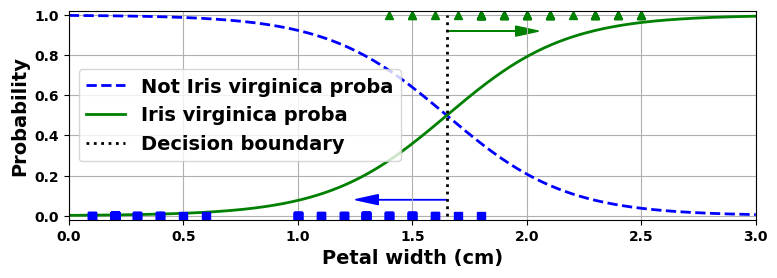

In [56]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))  # extra code – not needed, just formatting
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

# extra code – this section beautifies and saves Figure 4–23
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()
save_fig("logistic_regression_plot")

plt.show()

In [57]:
decision_boundary   #  there is a decision boundary at around 1.6 cm where both probabilities are equal to 50%: 
# if the petal width is greater than 1.6 cm the classifier will predict that the flower is an Iris virginica, 
# and otherwise it will predict that it is not (even if it is not very confident):

1.6516516516516517

In [58]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

LogisticRegression(C=2, random_state=42)

<Figure size 1000x400 with 0 Axes>

<a list of 6 text.Text objects>

Text(3.5, 1.27, 'Not Iris virginica')

Text(6.5, 2.3, 'Iris virginica')

Text(0.5, 0, 'Petal length')

Text(0, 0.5, 'Petal width')

(2.9, 7.0, 0.8, 2.7)

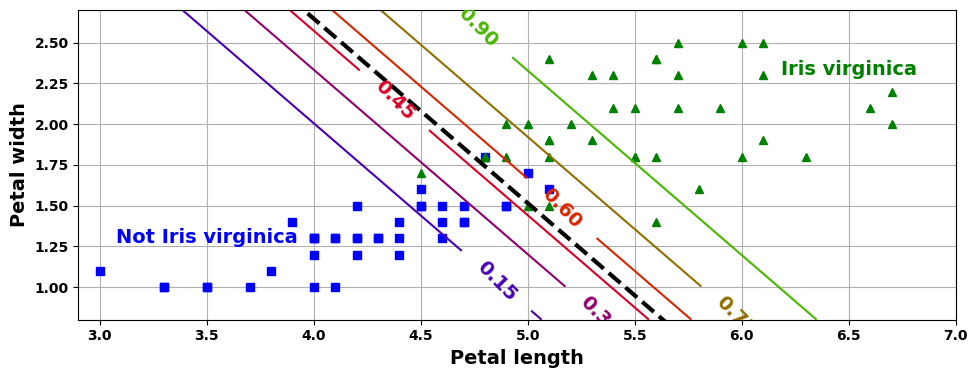

In [59]:
# extra code – this cell generates and saves Figure 4–24

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

# for the contour plot
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]  # one instance per point on the figure
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

# for the decision boundary
left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()
save_fig("logistic_regression_contour_plot")
plt.show()

Figure 4-24 shows the same dataset, but this time displaying two features: petal width and length. Once trained, the logistic regression classifier can, based on these two features, estimate the probability that a new flower is an Iris virginica. The dashed line represents the points where the model estimates a 50% probability: this is the model’s decision boundary. Note that it is a linear boundary.⁠14 Each parallel line represents the points where the model outputs a specific probability, from 15% (bottom left) to 90% (top right). All the flowers beyond the top-right line have over 90% chance of being Iris virginica, according to the model.

## Softmax Regression
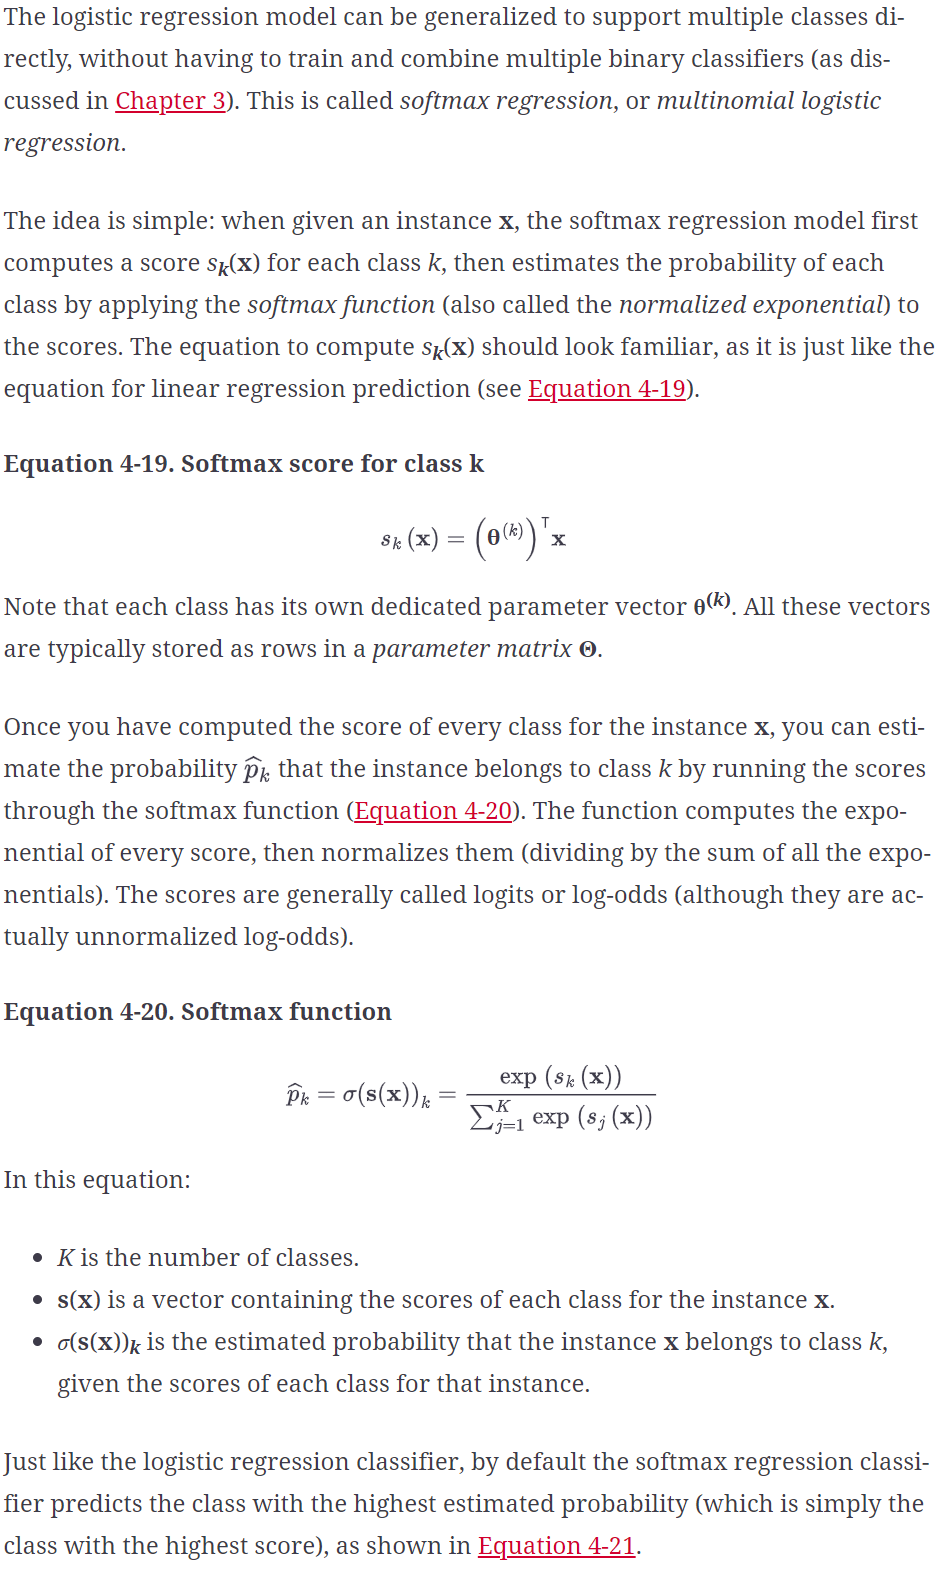
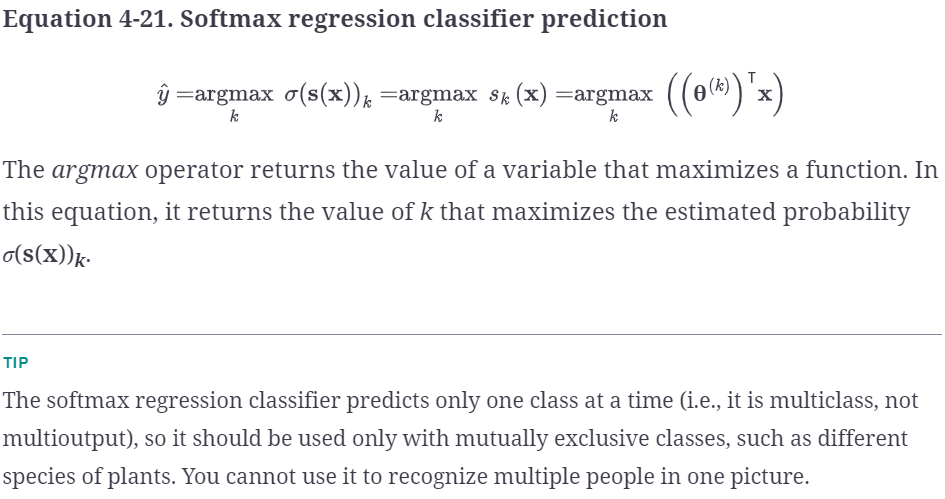
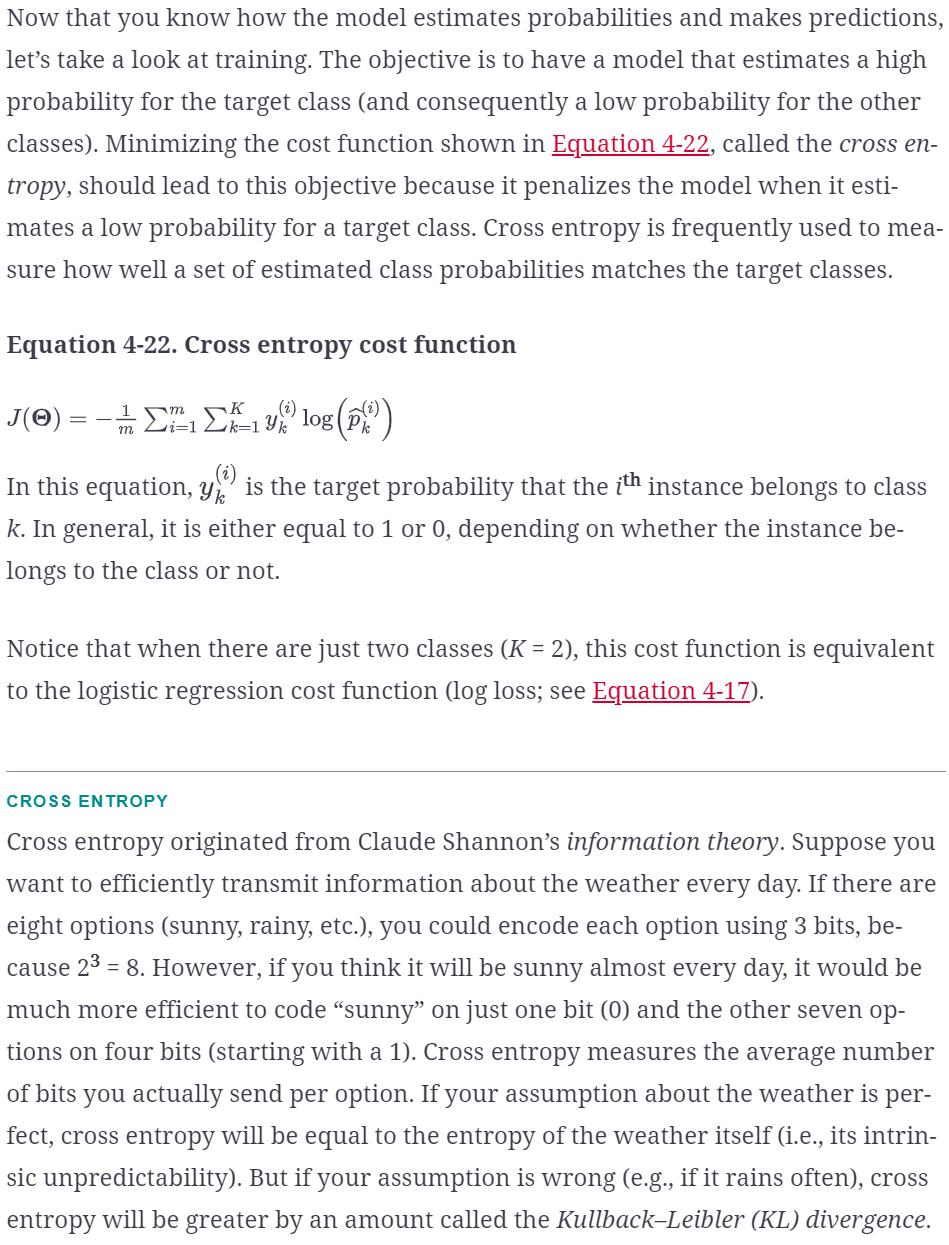
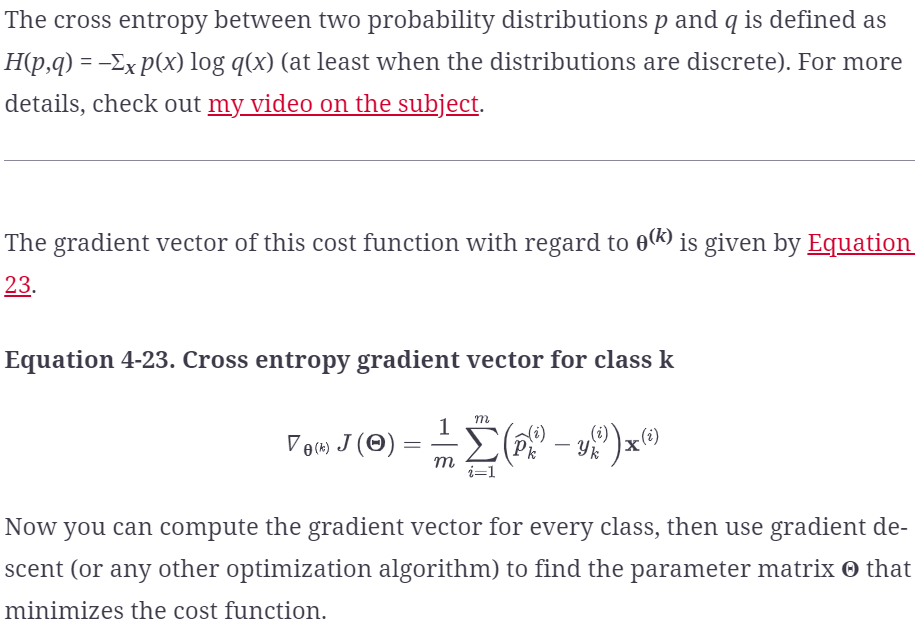

In [60]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [61]:
softmax_reg.predict([[5, 2]])  # predicts class 2

array([2])

In [62]:
softmax_reg.predict_proba([[5, 2]]).round(2)  # class 2 with 96% probability

array([[0.  , 0.04, 0.96]])

<Figure size 1000x400 with 0 Axes>

<a list of 6 text.Text objects>

Text(0.5, 0, 'Petal length')

Text(0, 0.5, 'Petal width')

(0.5, 7.0, 0.0, 3.5)

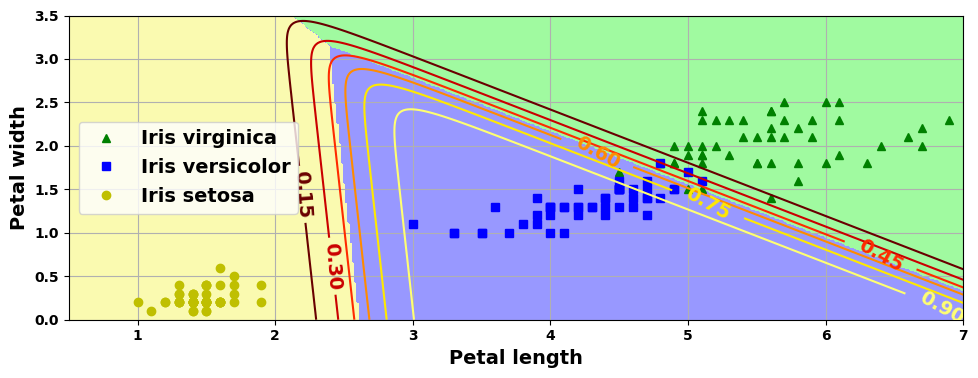

In [63]:
# extra code – this cell generates and saves Figure 4–25

from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()
save_fig("softmax_regression_contour_plot")
plt.show()

# Exercise solutions

## 1. to 11.

1. If you have a training set with millions of features you can use Stochastic Gradient Descent or Mini-batch Gradient Descent, and perhaps Batch Gradient Descent if the training set fits in memory. But you cannot use the Normal Equation or the SVD approach because the computational complexity grows quickly (more than quadratically) with the number of features.
2. If the features in your training set have very different scales, the cost function will have the shape of an elongated bowl, so the Gradient Descent algorithms will take a long time to converge. To solve this you should scale the data before training the model. Note that the Normal Equation or SVD approach will work just fine without scaling. Moreover, regularized models may converge to a suboptimal solution if the features are not scaled: since regularization penalizes large weights, features with smaller values will tend to be ignored compared to features with larger values.
3. Gradient Descent cannot get stuck in a local minimum when training a Logistic Regression model because the cost function is convex. _Convex_ means that if you draw a straight line between any two points on the curve, the line never crosses the curve.
4. If the optimization problem is convex (such as Linear Regression or Logistic Regression), and assuming the learning rate is not too high, then all Gradient Descent algorithms will approach the global optimum and end up producing fairly similar models. However, unless you gradually reduce the learning rate, Stochastic GD and Mini-batch GD will never truly converge; instead, they will keep jumping back and forth around the global optimum. This means that even if you let them run for a very long time, these Gradient Descent algorithms will produce slightly different models.
5. If the validation error consistently goes up after every epoch, then one possibility is that the learning rate is too high and the algorithm is diverging. If the training error also goes up, then this is clearly the problem and you should reduce the learning rate. However, if the training error is not going up, then your model is overfitting the training set and you should stop training.
6. Due to their random nature, neither Stochastic Gradient Descent nor Mini-batch Gradient Descent is guaranteed to make progress at every single training iteration. So if you immediately stop training when the validation error goes up, you may stop much too early, before the optimum is reached. A better option is to save the model at regular intervals; then, when it has not improved for a long time (meaning it will probably never beat the record), you can revert to the best saved model.
7. Stochastic Gradient Descent has the fastest training iteration since it considers only one training instance at a time, so it is generally the first to reach the vicinity of the global optimum (or Mini-batch GD with a very small mini-batch size). However, only Batch Gradient Descent will actually converge, given enough training time. As mentioned, Stochastic GD and Mini-batch GD will bounce around the optimum, unless you gradually reduce the learning rate.
8. If the validation error is much higher than the training error, this is likely because your model is overfitting the training set. One way to try to fix this is to reduce the polynomial degree: a model with fewer degrees of freedom is less likely to overfit. Another thing you can try is to regularize the model—for example, by adding an ℓ₂ penalty (Ridge) or an ℓ₁ penalty (Lasso) to the cost function. This will also reduce the degrees of freedom of the model. Lastly, you can try to increase the size of the training set.
9. If both the training error and the validation error are almost equal and fairly high, the model is likely underfitting the training set, which means it has a high bias. You should try reducing the regularization hyperparameter _α_.
10. Let's see:
  * A model with some regularization typically performs better than a model without any regularization, so you should generally prefer Ridge Regression over plain Linear Regression.
  * Lasso Regression uses an ℓ₁ penalty, which tends to push the weights down to exactly zero. This leads to sparse models, where all weights are zero except for the most important weights. This is a way to perform feature selection automatically, which is good if you suspect that only a few features actually matter. When you are not sure, you should prefer Ridge Regression.
  * Elastic Net is generally preferred over Lasso since Lasso may behave erratically in some cases (when several features are strongly correlated or when there are more features than training instances). However, it does add an extra hyperparameter to tune. If you want Lasso without the erratic behavior, you can just use Elastic Net with an `l1_ratio` close to 1.
11. If you want to classify pictures as outdoor/indoor and daytime/nighttime, since these are not exclusive classes (i.e., all four combinations are possible) you should train two Logistic Regression classifiers.

## 12. Batch Gradient Descent with early stopping for Softmax Regression
Exercise: _Implement Batch Gradient Descent with early stopping for Softmax Regression without using Scikit-Learn, only NumPy. Use it on a classification task such as the iris dataset._

Let's start by loading the data. We will just reuse the Iris dataset we loaded earlier.

In [64]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"].values

We need to add the bias term for every instance ($x_0 = 1$). The easiest option to do this would be to use Scikit-Learn's `add_dummy_feature()` function, but the point of this exercise is to get a better understanding of the algorithms by implementing them manually. So here is one possible implementation:

In [65]:
X_with_bias = np.c_[np.ones(len(X)), X]

The easiest option to split the dataset into a training set, a validation set and a test set would be to use Scikit-Learn's `train_test_split()` function, but again, we want to do it manually:

In [66]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

np.random.seed(42)
rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

The targets are currently class indices (0, 1 or 2), but we need target class probabilities to train the Softmax Regression model. Each instance will have target class probabilities equal to 0.0 for all classes except for the target class which will have a probability of 1.0 (in other words, the vector of class probabilities for any given instance is a one-hot vector). Let's write a small function to convert the vector of class indices into a matrix containing a one-hot vector for each instance. To understand this code, you need to know that `np.diag(np.ones(n))` creates an n×n matrix full of 0s except for 1s on the main diagonal. Moreover, if `a` is a NumPy array, then `a[[1, 3, 2]]` returns an array with 3 rows equal to `a[1]`, `a[3]` and `a[2]` (this is [advanced NumPy indexing](https://numpy.org/doc/stable/user/basics.indexing.html#advanced-indexing)).

In [67]:
def to_one_hot(y):
    return np.diag(np.ones(y.max() + 1))[y]

Let's test this function on the first 10 instances:

In [68]:
y_train[:10]

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1])

In [69]:
to_one_hot(y_train[:10])

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

Looks good, so let's create the target class probabilities matrix for the training set and the test set:

In [70]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

Now let's scale the inputs. We compute the mean and standard deviation of each feature on the training set (except for the bias feature), then we center and scale each feature in the training set, the validation set, and the test set:

In [71]:
mean = X_train[:, 1:].mean(axis=0)
std = X_train[:, 1:].std(axis=0)
X_train[:, 1:] = (X_train[:, 1:] - mean) / std
X_valid[:, 1:] = (X_valid[:, 1:] - mean) / std
X_test[:, 1:] = (X_test[:, 1:] - mean) / std

Now let's implement the Softmax function. Recall that it is defined by the following equation:

$\sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}$

In [72]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = exps.sum(axis=1, keepdims=True)
    return exps / exp_sums

We are almost ready to start training. Let's define the number of inputs and outputs:

In [73]:
n_inputs = X_train.shape[1]  # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))  # == 3 (there are 3 iris classes)

Now here comes the hardest part: training! Theoretically, it's simple: it's just a matter of translating the math equations into Python code. But in practice, it can be quite tricky: in particular, it's easy to mix up the order of the terms, or the indices. You can even end up with code that looks like it's working but is actually not computing exactly the right thing. When unsure, you should write down the shape of each term in the equation and make sure the corresponding terms in your code match closely. It can also help to evaluate each term independently and print them out. The good news it that you won't have to do this everyday, since all this is well implemented by Scikit-Learn, but it will help you understand what's going on under the hood.

So the equations we will need are the cost function:

$J(\mathbf{\Theta}) =
- \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

And the equation for the gradients:

$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

Note that $\log\left(\hat{p}_k^{(i)}\right)$ may not be computable if $\hat{p}_k^{(i)} = 0$. So we will add a tiny value $\epsilon$ to $\log\left(\hat{p}_k^{(i)}\right)$ to avoid getting `nan` values.

In [74]:
eta = 0.5
n_epochs = 5001
m = len(X_train)
epsilon = 1e-5

np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)

for epoch in range(n_epochs):
    logits = X_train @ Theta
    Y_proba = softmax(logits)
    if epoch % 1000 == 0:
        Y_proba_valid = softmax(X_valid @ Theta)
        xentropy_losses = -(Y_valid_one_hot * np.log(Y_proba_valid + epsilon))
        print(epoch, xentropy_losses.sum(axis=1).mean())
    error = Y_proba - Y_train_one_hot
    gradients = 1 / m * X_train.T @ error
    Theta = Theta - eta * gradients

0 3.7085808486476917
1000 0.1451936748083065
2000 0.1301309575504088
3000 0.12009639326384533
4000 0.11372961364786881
5000 0.11002459532472425


And that's it! The Softmax model is trained. Let's look at the model parameters:

In [75]:
Theta

array([[ 0.41931626,  6.11112089, -5.52429876],
       [-6.53054533, -0.74608616,  8.33137102],
       [-5.28115784,  0.25152675,  6.90680425]])

Let's make predictions for the validation set and check the accuracy score:

In [76]:
logits = X_valid @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_valid).mean()
accuracy_score

0.9333333333333333

Well, this model looks pretty ok. For the sake of the exercise, let's add a bit of $\ell_2$ regularization. The following training code is similar to the one above, but the loss now has an additional $\ell_2$ penalty, and the gradients have the proper additional term (note that we don't regularize the first element of `Theta` since this corresponds to the bias term). Also, let's try increasing the learning rate `eta`.

In [77]:
eta = 0.5
n_epochs = 5001
m = len(X_train)
epsilon = 1e-5
alpha = 0.01  # regularization hyperparameter

np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)

for epoch in range(n_epochs):
    logits = X_train @ Theta
    Y_proba = softmax(logits)
    if epoch % 1000 == 0:
        Y_proba_valid = softmax(X_valid @ Theta)
        xentropy_losses = -(Y_valid_one_hot * np.log(Y_proba_valid + epsilon))
        l2_loss = 1 / 2 * (Theta[1:] ** 2).sum()
        total_loss = xentropy_losses.sum(axis=1).mean() + alpha * l2_loss
        print(epoch, total_loss.round(4))
    error = Y_proba - Y_train_one_hot
    gradients = 1 / m * X_train.T @ error
    gradients += np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 3.7372
1000 0.3259
2000 0.3259
3000 0.3259
4000 0.3259
5000 0.3259


Because of the additional $\ell_2$ penalty, the loss seems greater than earlier, but perhaps this model will perform better? Let's find out:

In [78]:
logits = X_valid @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_valid).mean()
accuracy_score

0.9333333333333333

In this case, the $\ell_2$ penalty did not change the test accuracy. Perhaps try fine-tuning `alpha`?

Now let's add early stopping. For this we just need to measure the loss on the validation set at every iteration and stop when the error starts growing.

In [79]:
eta = 0.5
n_epochs = 50_001
m = len(X_train)
epsilon = 1e-5
C = 100  # regularization hyperparameter
best_loss = np.infty

np.random.seed(42)
Theta = np.random.randn(n_inputs, n_outputs)

for epoch in range(n_epochs):
    logits = X_train @ Theta
    Y_proba = softmax(logits)
    Y_proba_valid = softmax(X_valid @ Theta)
    xentropy_losses = -(Y_valid_one_hot * np.log(Y_proba_valid + epsilon))
    l2_loss = 1 / 2 * (Theta[1:] ** 2).sum()
    total_loss = xentropy_losses.sum(axis=1).mean() + 1 / C * l2_loss
    if epoch % 1000 == 0:
        print(epoch, total_loss.round(4))
    if total_loss < best_loss:
        best_loss = total_loss
    else:
        print(epoch - 1, best_loss.round(4))
        print(epoch, total_loss.round(4), "early stopping!")
        break
    error = Y_proba - Y_train_one_hot
    gradients = 1 / m * X_train.T @ error
    gradients += np.r_[np.zeros([1, n_outputs]), 1 / C * Theta[1:]]
    Theta = Theta - eta * gradients

0 3.7372
281 0.3256
282 0.3256 early stopping!


In [80]:
logits = X_valid @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_valid).mean()
accuracy_score

0.9333333333333333

Oh well, still no change in validation accuracy, but at least early stopping shortened training a bit.

Now let's plot the model's predictions on the whole dataset (remember to scale all features fed to the model):

<Figure size 1000x400 with 0 Axes>

<a list of 8 text.Text objects>

Text(0.5, 0, 'Petal length')

Text(0, 0.5, 'Petal width')

(0.0, 7.0, 0.0, 3.5)

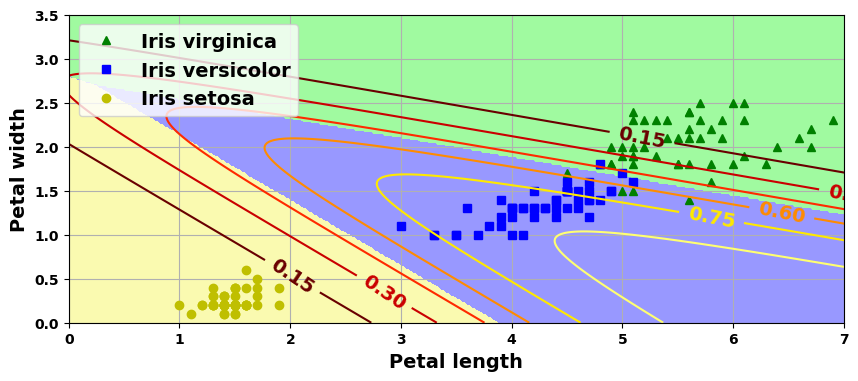

In [81]:
custom_cmap = mpl.colors.ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new = (X_new - mean) / std
X_new_with_bias = np.c_[np.ones(len(X_new)), X_new]

logits = X_new_with_bias @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 7, 0, 3.5])
plt.grid()
plt.show()

And now let's measure the final model's accuracy on the test set:

In [82]:
logits = X_test @ Theta
Y_proba = softmax(logits)
y_predict = Y_proba.argmax(axis=1)

accuracy_score = (y_predict == y_test).mean()
accuracy_score

0.9666666666666667

Well we get even better performance on the test set. This variability is likely due to the very small size of the dataset: depending on how you sample the training set, validation set and the test set, you can get quite different results. Try changing the random seed and running the code again a few times, you will see that the results will vary.